# Exercises in Clustering

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Ch5_bike_station_locations.csv')
display(df.head())
print(f"rows and coloumns: {df.shape}")

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


rows and coloumns: (244, 2)


<p>Just by looking at the data, I can see it is unlabeled, so it's unsupervised. Clustering applied to unlabeled data is about finding an underlying natural structure. Basically, which group each data point belongs to, and how many groups there are. K-Means is one way to do this. The elbow method involves trying different amounts of K (the total number of clusters). For each K, the SSE will go down, but it will eventually flatten at a point where we’re not learning much more about the data. At that stage, we’re just splitting hairs instead of discovering meaningful natural groups.</p>
<ul>
<li>K-Mean: Iterative algorithm to group into K clusters. Very sensitive to outliers</li>
<br>
<li>SSE(sum of sqared errors): The sum of squared Euclidean distance from each point to its own cluster centroid. "kmeans.insertia_ in scikit-learn"</li>
<br>
<li>Centroid: The mean center of a group</li>
<br>
<li>Dendrogram: A tree diagram that in hierachical order show how clusters merge as distance tolerance increases. "Cut" the tree horizontally to pick a number of clusters</li>
<br>
<li>Agglomerative: Type of hierarchical clustering method. Start's bottom-up where each data points first is it's own cluster and then repeatively merge closer clusters till everything is one cluster. We choose "linkage rule". Rules: Single linkage(min)=shortest distance between two clusters, any point in A and any point in B / Complete linkage(max)= largest distance between any point in A and any point in B / Avarage linkage= compare each point in clusters pairwise and take the mean distance / Ward= will merge the pair that causes the smallest increase SEE  </li>
<br>
<li>DBSCAN: Finds dense regions and grows clusters from them. Points in sparse areas are called noise. Two parameters: "eps=radius" of the neighborhood around a point and "min_sample"=How many points must fall within that radius for a point to count as a core point. Point types are core=has a least "min-samples" neighbors within "eps". Border: not core, but within "eps" of a core point. We are still asigned within the core's cluster. Noise=Neither and further away</li>
<br>
<li>Silhouette: Quality matrix for seperation/distance to the nearest other cluster and tightness within its cluster. 1 good, 0 overlapping, &lt;0 likely misassigned </li>
<br>
<li>Rand Index / Adjusted Rand Index(ARI): Matrics that compare clustering to konown labels, if the data have it. Goes from 1.0 = perfect match to 0 = random</li>
</ul>



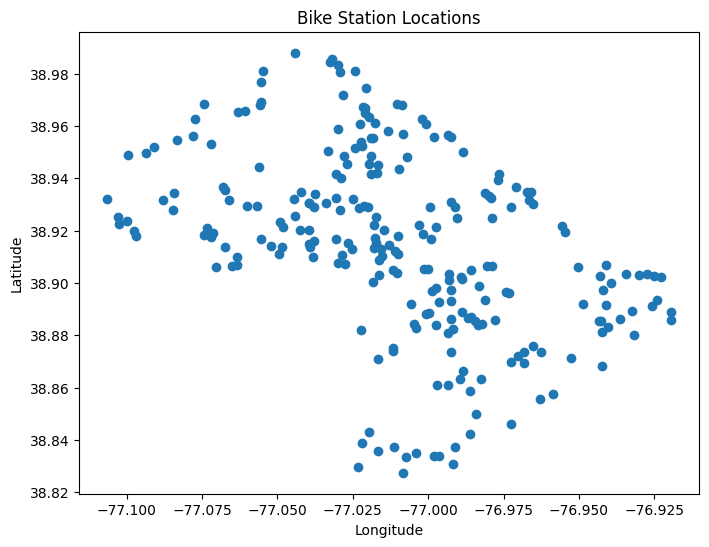

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'])
plt.title('Bike Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<p>The scatterplot reveals some points (bikestations) are gathered closer together in some areas, while less desity in others. The data is very suitable for clustering analysis.</p>

<hr>

<h3>Task 1 Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.</h3>

In [5]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

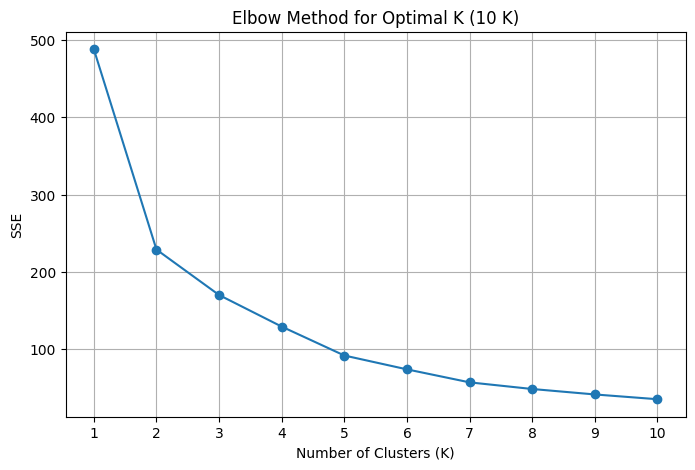

In [6]:
# Try different K and store SSE
sse = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_) # inertia_ is the SSE. It's the distance between the data points and their assigned cluster centers, squared.

plt.figure(figsize=(8, 5))
plt.plot(K_values, sse, marker='o')
plt.title('Elbow Method for Optimal K (10 K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.xticks(K_values)
plt.grid(True)
plt.show()

<p>As expected it the SSE climbs down great the first K and flattens more clusters we add. Biggest drop from K=1 to K2. Makes sense since 1 cluster is the worst possible case. Second best improvement K=2 to K5. Third best is from K=5 to K=7. Still some gains, but not as much. There is only tiny improvement. </p>

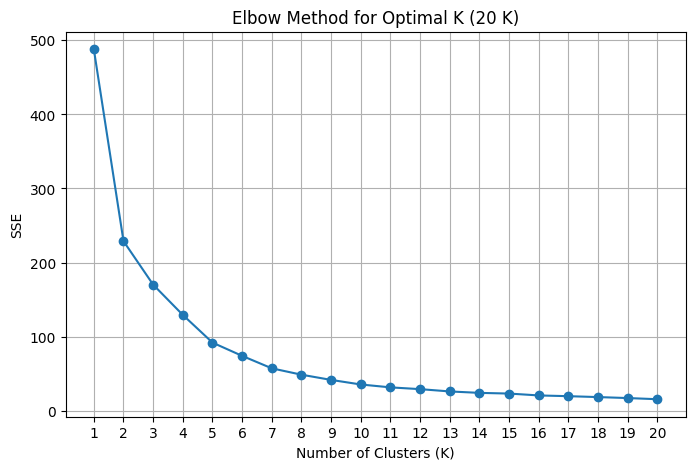

In [7]:
# Try different K and store SSE
sse = []
K_values = range(1, 21)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_) # inertia_ is the SSE. It's the distance between the data points and their assigned cluster centers, squared.

plt.figure(figsize=(8, 5))
plt.plot(K_values, sse, marker='o')
plt.title('Elbow Method for Optimal K (20 K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.xticks(K_values)
plt.grid(True)
plt.show()

<p>It's not perfectly clear where to make the best cut, but I think the elbow appears between K=5 and K=7. After that the SSE decrease starts to slow down significantly.   </p>

<hr>
<h3>Task 2 Visualize the K-Means clustering result for the best K.</h3>

In [8]:
kmeans6 = KMeans(n_clusters=6, random_state=2, n_init=10).fit(scaled_data)
df['KMeansCluster'] = kmeans6.labels_
print(f"The amount of clusters : ",df['KMeansCluster'].unique())
print(kmeans6.cluster_centers_.shape[0])

The amount of clusters :  [0 5 2 3 4 1]
6


In [9]:
df.head() # Confirming the results are added to df

,latitude,longitude,KMeansCluster
0,38.956590,-76.993437,0
1,38.905218,-77.001496,5
2,38.980858,-77.054722,0
3,38.902925,-76.929915,2
4,38.949498,-77.093620,3


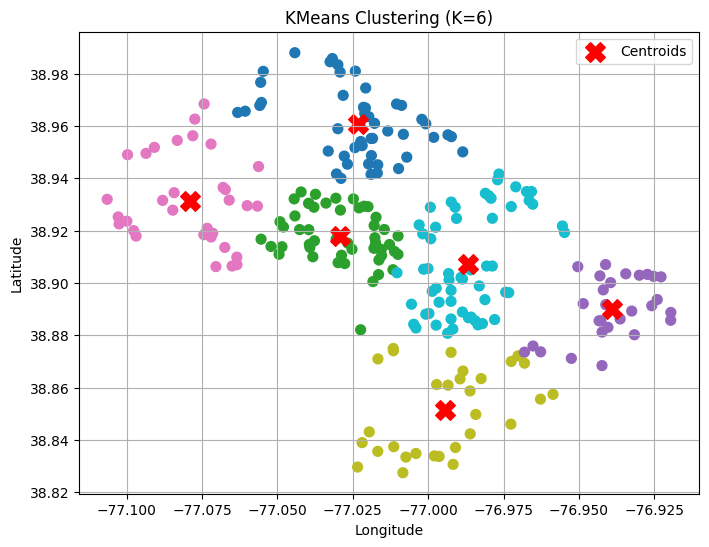

In [10]:
centroids_deg = scaler.inverse_transform(kmeans6.cluster_centers_) 
centroids_lat = centroids_deg[:, 0]
centroids_lon = centroids_deg[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['KMeansCluster'], cmap='tab10', s=50)
plt.scatter(centroids_lon, centroids_lat, color='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (K=6)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

<hr>
<h3>Task 3 Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.</h3>

<p><code>Agglomerative clustering</code>: I have used Ward here. Avarage would also been a good option. Single(min) causes long snakey shapes while complete(max) a very compact and can oversplit long shapes.</p>
<p><code>Dendragram:</code> lets do the full tree to find the best place to cut the tree</p>

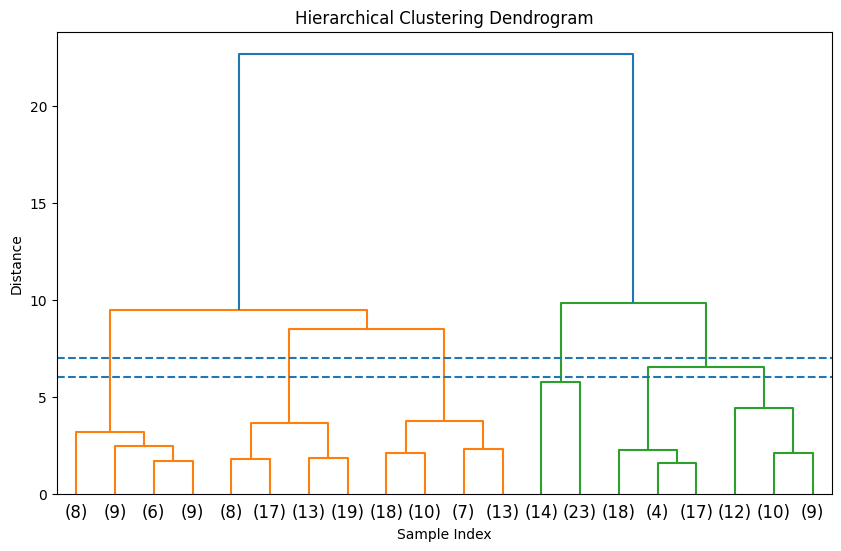

In [11]:
myAgglomerative = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(myAgglomerative, truncate_mode='lastp',p=20,show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.axhline(y=6, linestyle='--', linewidth=1.5)
plt.axhline(y=7, linestyle='--', linewidth=1.5)

plt.show()

<h4><strong>Results / evaulation:</strong></h4> <p>to find the best (or a sensible) number of clusters, I most cut the tree horizontal at some height on the <i>y</i> axis. The number of vertical branches intersect are the total clusters. <br> The best place to cut is below a big vertical gap. this avoids merging clusters that are far apart</p>
<p>Reading the plot, there are a big jump around K=10 to K=22, between K=5 to K=10 seems to be the best spot. I've added two lines, one at K=6 and one at K=7. These seems to be the most optimal, and also matches the K-Means elbow. Best is K=6</p>

<hr>
<h3>Task 4 Generate this number of clusters with Agglomerative clustering and visualize the clustering.</h3>

In [12]:
k = 6
model = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = model.fit_predict(scaled_data)

df['AgglomerativeCluster'] = labels
df.head()

,latitude,longitude,KMeansCluster,AgglomerativeCluster
0,38.956590,-76.993437,0,1
1,38.905218,-77.001496,5,5
2,38.980858,-77.054722,0,1
3,38.902925,-76.929915,2,0
4,38.949498,-77.093620,3,3


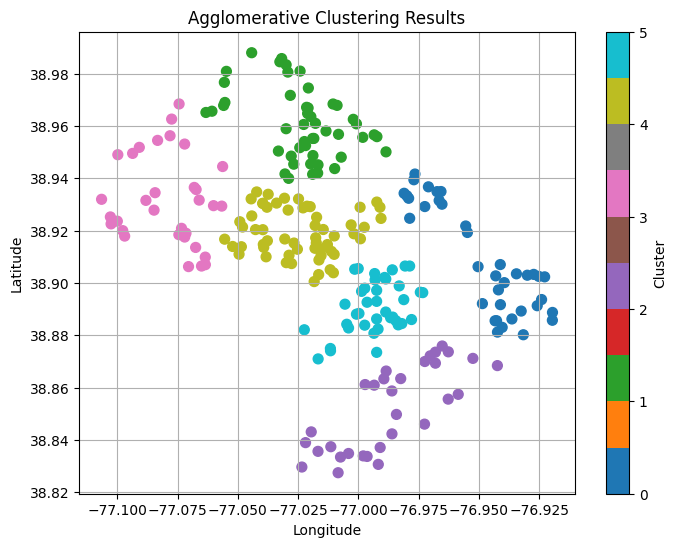

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['AgglomerativeCluster'], cmap='tab10', s=50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

<p>The results are good looking and fairly similar to the K-Mean. The blue cluster(0) is maybe snaking abit and same with the purple cluster(2). But it looks fine</p>

<hr>
<h3>Task 5 Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)</h3>

<ul>
    <li>eps: how close points points most be to another point to count as neighbors</li>
    <li>min_samples: how many neighbours are needed to call a point core</li>
    <li>Core-point: has a least "min-samples" neighbors within "eps".</li>
    <li>Border-point: not core, but within "eps" of a core-point.</li>
    <li>Noise-point: further away</li>
</ul>

In [ ]:
unscaled_data = df[['longitude', 'latitude']].to_numpy() # The hint is suggesting to use the unscaled data

# Parameters
eps = 0.01
min_samples = 8

myDBSCAN = DBSCAN(eps=eps, min_samples=min_samples)
labels = myDBSCAN.fit_predict(unscaled_data)
df['DBSCANCluster'] = labels
df.head()

,latitude,longitude,KMeansCluster,AgglomerativeCluster,DBSCANCluster
0,38.956590,-76.993437,0,1,-1
1,38.905218,-77.001496,5,5,1
2,38.980858,-77.054722,0,1,-1
3,38.902925,-76.929915,2,0,0
4,38.949498,-77.093620,3,3,-1


In [ ]:
print(f"The amount of clusters : ",df['DBSCANCluster'].unique())

n_clusters =len(set(labels)-{ -1 })
n_noise = (labels == -1).sum()
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")
print(f"The total amount of points in data are {df.shape[0]}")

The amount of clusters :  [-1  1  0  6  5  2  4  3]
Estimated number of clusters: 7
Estimated number of noise points: 93
The total amount of points in data are 244


<h4>With DBSCAN at <code>eps=0.01</code> and <code>min_samples=8</code> there are 7 dense groups and 93 noise-points, out of a total of 244 points. Meaning 38% noise not included a cluster. Only 151 points fall into a cluser.</h4>

<h4>Lets try a different values</h4>

In [41]:
epsArray = [0.003, 0.005, 0.007, 0.009, 0.01, 0.015, 0.02, 0.03]
min_samplesArray = [4,5,6,7,8,9,10,12,14]

for eps in epsArray:
    for min_samples in min_samplesArray:
        myDBSCAN = DBSCAN(eps=eps, min_samples=min_samples)
        labels = myDBSCAN.fit_predict(unscaled_data)
        df['DBSCANCluster'] = labels
        n_clusters =len(set(labels)-{ -1 })
        n_noise = (labels == -1).sum()
        print(f"\n with eps={eps} and min_samples={min_samples} number of clusters: {n_clusters}")
        print(f"with eps={eps} and min_samples={min_samples} number of noise points: {n_noise}")




 with eps=0.003 and min_samples=4 number of clusters: 3
with eps=0.003 and min_samples=4 number of noise points: 230

 with eps=0.003 and min_samples=5 number of clusters: 1
with eps=0.003 and min_samples=5 number of noise points: 239

 with eps=0.003 and min_samples=6 number of clusters: 0
with eps=0.003 and min_samples=6 number of noise points: 244

 with eps=0.003 and min_samples=7 number of clusters: 0
with eps=0.003 and min_samples=7 number of noise points: 244

 with eps=0.003 and min_samples=8 number of clusters: 0
with eps=0.003 and min_samples=8 number of noise points: 244

 with eps=0.003 and min_samples=9 number of clusters: 0
with eps=0.003 and min_samples=9 number of noise points: 244

 with eps=0.003 and min_samples=10 number of clusters: 0
with eps=0.003 and min_samples=10 number of noise points: 244

 with eps=0.003 and min_samples=12 number of clusters: 0
with eps=0.003 and min_samples=12 number of noise points: 244

 with eps=0.003 and min_samples=14 number of cluste

<h4>What we can learn is, any value of eps >= 0.02 will merge every point into one or two giant clusters. Which is undesired. This means DBSCAN is sensitive to the neighborhood radius. This list could be visualized with a HeatMap, but I've run out of time and most move on. But the keeping the settings at epos=0.01 and min_samples=9 results in 6 compact clusters and avoids too much execssive noise</h4>

<h4>With DBSCAN at <code>eps=0.01</code> and <code>min_samples=9</code> there are 6 dense groups and 103 noise-points, out of a total of 244 points. Meaning 42% noise not included a cluster.</h4>

<hr>
<h3>Task 6 Visual the final DBSCAN clustering you decided upon in 5.</h3>

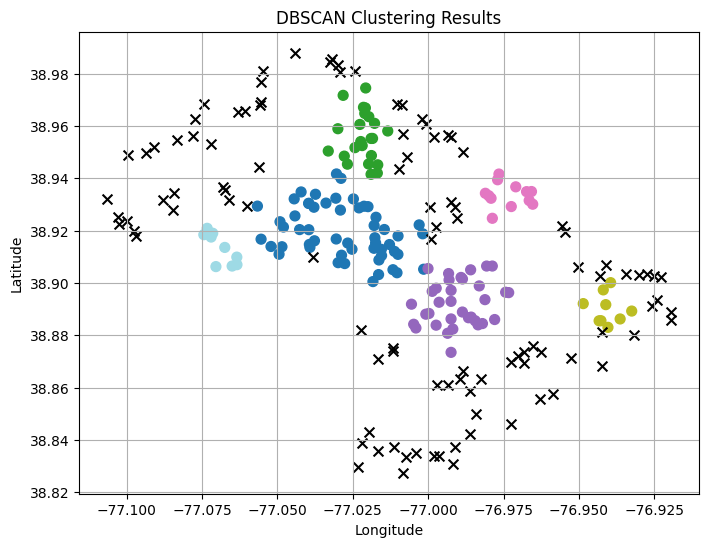

In [73]:
eps = 0.01
min_samples = 9

myDBSCAN = DBSCAN(eps=eps, min_samples=min_samples)
labels = myDBSCAN.fit_predict(unscaled_data)
df['DBSCANCluster'] = labels

noise = labels == -1

plt.figure(figsize=(8, 6))

plt.scatter(df.loc[~noise, 'longitude'], df.loc[~noise, 'latitude'], c=df.loc[~noise, 'DBSCANCluster'], cmap='tab20', s=50)

plt.scatter(df[noise]['longitude'], df[noise]['latitude'],marker='x', c='black', s=50, label='Noise')

plt.title('DBSCAN Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<h5>Upon expection it seems like some of the groups are really small. Like the Cyan blue on very left and golden greenish on very right. Same with pink. Maybe too much noise. In generel DBSCAN finds a few dense pockets and marks the rest as noise. Since the clusters feel too tiny and noise too heavy, I could have tryied slightly increase eps or dcrease min_samples and replot again. But I think the results are satifying enough</h3>

<hr>
<h3>Task 7 Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.</h3>